In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [42]:
temp_data = pd.read_csv('Data/gsod_station_722860.csv')
temp_data = temp_data.iloc[:, 1:]
# Convert the 'date' column to datetime
temp_data['date'] = pd.to_datetime(temp_data['date'])
temp_data

,date,temp,max,min
0,1933-01-01,13.67,18.89,2.78
1,1933-01-02,13.89,19.61,1.89
2,1933-01-03,10.83,16.28,0.78
3,1933-01-04,14.94,21.28,1.28
4,1933-01-05,18.11,23.50,6.89
...,...,...,...,...
33646,2025-03-27,13.56,18.89,11.50
33647,2025-03-28,13.00,14.22,12.00
33648,2025-03-29,13.22,19.72,6.61
33649,2025-03-30,12.61,18.89,6.61


In [43]:
max_outliers = temp_data[temp_data['max'] > 50]
max_outliers

,date,temp,max,min
13463,1969-12-15,8.78,5537.72,-2.78
14722,1973-05-27,19.33,5537.72,7.72
15607,1975-10-29,16.56,5537.72,7.22
28815,2011-12-28,8.22,5537.72,-2.50
28818,2011-12-31,11.56,5537.72,1.72
31007,2017-12-28,11.44,5537.72,1.22
32089,2020-12-20,8.89,5537.72,-1.78


In [44]:
min_outliers = temp_data[temp_data['min'] > 50]
min_outliers

,date,temp,max,min
7,1933-01-08,14.44,23.50,5537.72
164,1933-06-14,33.17,38.89,5537.72
12673,1967-10-17,22.61,35.50,5537.72
22929,1995-11-15,11.83,23.78,5537.72


In [46]:
# Fixing Outliers for max temperature
for i in range(len(temp_data)):
    if temp_data['max'][i] > 50:
        # Find the average temperature across all years on the SAME day
        date = temp_data['date'][i]
        day = date.day
        month = date.month
        avy = temp_data[(temp_data['date'].dt.day == day) & 
                             (temp_data['date'].dt.month == month) & 
                             (temp_data['max'] < 40)]['max']
        avy = avy.mean()
        
        # Finf the average temperature across the previous week and the next week
        week_before = temp_data[(temp_data['date'] < date) & 
                                (temp_data['date'] >= date - pd.Timedelta(days=7))]['max']
        week_after = temp_data[(temp_data['date'] > date) &
                                (temp_data['date'] <= date + pd.Timedelta(days=7)) &
                                (temp_data['max'] < 40)]['max']
        avg_temp = (week_before.mean() + week_after.mean()) / 2
        
        NAfill = (avy + avg_temp) / 2
        print('Filling date:', date, 'with:', NAfill)
        temp_data.loc[i, 'max'] = NAfill

Filling date: 1969-12-15 00:00:00 with: 18.823131868131867
Filling date: 1973-05-27 00:00:00 with: 25.90239010989011
Filling date: 1975-10-29 00:00:00 with: 24.8903021978022
Filling date: 2011-12-28 00:00:00 with: 20.59742063492063
Filling date: 2011-12-31 00:00:00 with: 21.22724304465376
Filling date: 2017-12-28 00:00:00 with: 20.22295286063143
Filling date: 2020-12-20 00:00:00 with: 20.338681318681317


In [47]:
# Fixing Outliers for min temperature
for i in range(len(temp_data)):
    if temp_data['min'][i] > 50:
        # Find the average temperature across all years on the SAME day
        date = temp_data['date'][i]
        day = date.day
        month = date.month
        avy = temp_data[(temp_data['date'].dt.day == day) & 
                             (temp_data['date'].dt.month == month) & 
                             (temp_data['min'] < 40)]['min']
        avy = avy.mean()
        
        # Finf the average temperature across the previous week and the next week
        week_before = temp_data[(temp_data['date'] < date) & 
                                (temp_data['date'] >= date - pd.Timedelta(days=7))]['min']
        week_after = temp_data[(temp_data['date'] > date) &
                                (temp_data['date'] <= date + pd.Timedelta(days=7)) &
                                (temp_data['min'] < 40)]['min']
        avg_temp = (week_before.mean() + week_after.mean()) / 2
        
        NAfill = (avy + avg_temp) / 2
        print('Filling date:', date, 'with:', NAfill)
        temp_data.loc[i, 'min'] = NAfill

Filling date: 1933-01-08 00:00:00 with: 4.694425465838508
Filling date: 1933-06-14 00:00:00 with: 16.473214285714285
Filling date: 1967-10-17 00:00:00 with: 10.204972527472528
Filling date: 1995-11-15 00:00:00 with: 7.180384615384615


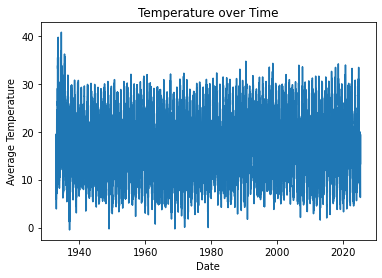

In [48]:
# plot the temp column vs the date column
plt.plot(temp_data['date'], temp_data['temp'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature over Time')
plt.show()


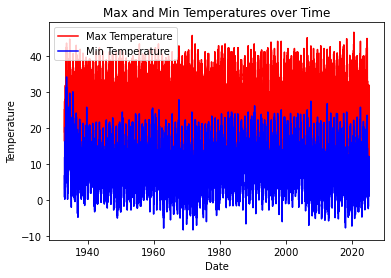

In [49]:
# Now plot the min and max temperatures over time in a different colour
plt.plot(temp_data['date'], temp_data['max'], label='Max Temperature', color='red')
plt.plot(temp_data['date'], temp_data['min'], label='Min Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Max and Min Temperatures over Time')
plt.legend()
plt.show()